Name: Celine Ratulowski
Date: 04/13/2021

## Problem Description:
In this problem, I will utilize a dataset of chest x-ray images to help learn how to diagnose pneumonia. We will try to diagnose as many images as possible correctly. 



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
import keras
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.4.1
Keras version: 2.4.3


In [ ]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/Machine Learning/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/Machine Learning/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5236 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build your CNN here
# CNN structure that includes at least 2 convolutional and 2 pooling layers
#create empty model
model = Sequential()

#add 2 convolutional layers & 2 pooling layers
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




#flattens thelayers so it can go into a fully-connected layer
model.add(Flatten())
#fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
#you will want to change the epochs to something small enough to run on your computer
training_results =model.fit_generator(
    train_data,
    steps_per_epoch = len(train_data),
    epochs=7, #number of epochs
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
164/164 [==============================] - 14s 83ms/step - loss: 0.5043 - accuracy: 0.7706 - val_loss: 0.8328 - val_accuracy: 0.6859
Epoch 2/7
164/164 [==============================] - 13s 82ms/step - loss: 0.1941 - accuracy: 0.9162 - val_loss: 0.9756 - val_accuracy: 0.7051
Epoch 3/7
164/164 [==============================] - 13s 82ms/step - loss: 0.1788 - accuracy: 0.9317 - val_loss: 0.4891 - val_accuracy: 0.7965
Epoch 4/7
164/164 [==============================] - 13s 79ms/step - loss: 0.1837 - accuracy: 0.9320 - val_loss: 0.4392 - val_accuracy: 0.8093
Epoch 5/7
164/164 [==============================] - 13s 78ms/step - loss: 0.1339 - accuracy: 0.9453 - val_loss: 0.3887 - val_accuracy: 0.8381
Epoch 6/7
164/164 [==============================] - 13s 79ms/step - loss: 0.1722 - accuracy: 0.9399 - val_loss: 0.5152 - val_accuracy: 0.7981
Epoch 7/7
164/164 [==============================] - 13s 78ms/step - loss: 0.1313 - accuracy: 0.9481 - val_loss: 0.9406 - val_accuracy: 0.7308

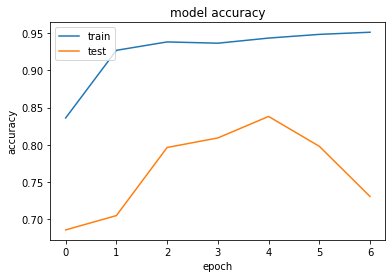

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])#training accuracy
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')


The model stops improving (overfitting occurs) at 4 epochs.

In [ ]:
#altered CNN
model2 = Sequential()

#add 2 convolutional layers & 2 pooling layers
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#Added extra convolutional layers
model2.add(Conv2D(32, (3, 3), activation = 'relu'))

model2.add(Flatten())
#fully connected layer 
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


I added an extra concolutional layer to change this CNN.


In [ ]:
#train the new model
training_results2 = model2.fit_generator(
    train_data,
    steps_per_epoch = len(train_data),
    epochs=7, #number of epochs
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
164/164 [==============================] - 13s 79ms/step - loss: 0.5376 - accuracy: 0.7480 - val_loss: 0.7233 - val_accuracy: 0.6571
Epoch 2/7
164/164 [==============================] - 13s 79ms/step - loss: 0.2188 - accuracy: 0.9177 - val_loss: 0.4389 - val_accuracy: 0.8045
Epoch 3/7
164/164 [==============================] - 13s 79ms/step - loss: 0.1573 - accuracy: 0.9394 - val_loss: 0.7657 - val_accuracy: 0.7484
Epoch 4/7
164/164 [==============================] - 13s 79ms/step - loss: 0.1514 - accuracy: 0.9419 - val_loss: 1.0269 - val_accuracy: 0.7067
Epoch 5/7
164/164 [==============================] - 13s 78ms/step - loss: 0.1371 - accuracy: 0.9487 - val_loss: 0.5142 - val_accuracy: 0.8077
Epoch 6/7
164/164 [==============================] - 13s 79ms/step - loss: 0.1464 - accuracy: 0.9414 - val_loss: 0.8865 - val_accuracy: 0.7276
Epoch 7/7
164/164 [==============================] - 13s 78ms/step - loss: 0.1370 - accuracy: 0.9454 - val_loss: 0.9798 - val_accuracy: 0.7276

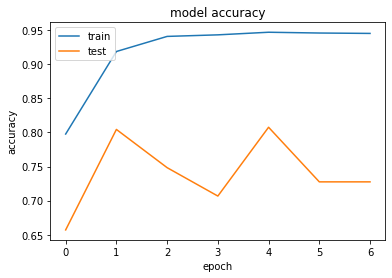

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The model stops worsens past 1 epoch, but peach again at 4 epochs. After this, the model consistently worsens.

-What configuration of your CNN proved to be more accurate? Why do you think this is the case?

The first configuration of my CNN proved to be the best because the accuracy of the test data constantly increached until it reached 4 epochs. The second model was worse because there was a large drop in accuracy between 1 and 4 epochs. The max accuracy was also higher in the first model than the second. 

-How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.

The most accurate I can make my model is about 85% accuracy.